In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import scipy.stats as stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel(r"C:\Users\danie\Downloads\regression_data.xls")

In [3]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
df.shape # con esto vemos la dimensión de nuestro df

(21597, 21)

In [5]:
df.info() # con esto vemos que tipo de dato es cada fila

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
null_counts = df.isnull().sum()

In [7]:
null_counts

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
# no tenemos nulos en todas nuestras filas int64

In [9]:
# Verificamos si la columna 'id' tiene valores duplicados

duplicados = df.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
df_duplicados = df[duplicados]

df_duplicados

# Vemos que existen varias transacciones de una misma propiedad

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20763,6300000226,2014-06-26,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,240000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000
21564,7853420110,2014-10-03,3,3.00,2780,6000,2.0,0,0,3,...,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,594866


In [10]:
# Eliminamos duplicados 
df = df.drop_duplicates(subset=['id'], keep='last')

In [11]:
# check duplicados
filas_duplicadas = df.duplicated(keep=False)

# Filtramos DataFrame
df_filas_duplicadas = df[filas_duplicadas]

df_filas_duplicadas

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [12]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns)) ]
df.columns # con esto vamos a poner todo en minusculas y quitar los espacios por _

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [13]:
df = df.drop(['id'], axis=1)
df # vamos a eliminiar el id ya que para la coorelación no va a tener un sentido posterior

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [14]:
# vamos a separar el mes y el año ya que vienen de una forma diferente

In [15]:
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,10
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,2
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,12
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,2014,5
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,2015,2
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,2014,6
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,2015,1


In [16]:
# ahora vamos a quita la columna date que no aporta valor
df.drop(['date'], axis=1, inplace=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,2


In [17]:
# vamos a generar unas estadísticas descriptivas de las columnas numéricas y a redondear usando lambda 

In [18]:
df.describe().apply(lambda x: round(x,2))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
count,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,...,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00,21420.00
mean,3.37,2.12,2083.13,15128.04,1.50,0.01,0.24,3.41,7.66,1791.17,...,1971.09,84.79,98077.87,47.56,-122.21,1988.38,12775.72,541861.43,2014.33,6.56
std,0.93,0.77,918.81,41530.80,0.54,0.09,0.77,0.65,1.17,828.69,...,29.39,402.57,53.48,0.14,0.14,685.54,27345.62,367556.94,0.47,3.12
min,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,...,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,78000.00,2014.00,1.00
25%,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1200.00,...,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,324950.00,2014.00,4.00
50%,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,7.00,1560.00,...,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,450550.00,2014.00,6.00
75%,4.00,2.50,2550.00,10690.50,2.00,0.00,0.00,4.00,8.00,2220.00,...,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10086.25,645000.00,2015.00,9.00
max,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,...,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,7700000.00,2015.00,12.00


In [19]:
# ahroa vamos a crear tabla correlatividad 

In [20]:
corr_matrix = df.corr()

In [21]:
corr_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
bedrooms,1.000000,0.515383,0.579069,0.032490,0.177734,-0.006940,0.080019,0.025893,0.357988,0.480242,...,0.155241,0.017977,-0.155061,-0.011266,0.132439,0.394949,0.030570,0.309640,-0.010479,-0.000853
bathrooms,0.515383,1.000000,0.755522,0.087779,0.501803,0.063734,0.187336,-0.129362,0.665587,0.686328,...,0.506252,0.050904,-0.203884,0.023143,0.223808,0.569453,0.087760,0.525215,-0.028630,0.009419
sqft_living,0.579069,0.755522,1.000000,0.172586,0.352868,0.103938,0.283851,-0.061677,0.762477,0.876533,...,0.316646,0.055028,-0.198995,0.050739,0.240212,0.756186,0.183837,0.701295,-0.030793,0.013848
sqft_lot,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021599,0.075203,-0.009169,0.113656,0.183210,...,0.052312,0.007679,-0.129422,-0.085822,0.230265,0.143805,0.717743,0.088789,0.005305,-0.002576
floors,0.177734,0.501803,0.352868,-0.005561,1.000000,0.023530,0.027575,-0.266859,0.458091,0.522751,...,0.488935,0.005714,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.254972,-0.024178,0.015776
waterfront,-0.006940,0.063734,0.103938,0.021599,0.023530,1.000000,0.403140,0.016564,0.082955,0.072055,...,-0.026529,0.093013,0.030545,-0.014427,-0.042181,0.086602,0.030772,0.266995,-0.004606,0.008455
view,0.080019,0.187336,0.283851,0.075203,0.027575,0.403140,1.000000,0.045059,0.250298,0.166889,...,-0.055351,0.103667,0.086890,0.005383,-0.079426,0.279320,0.073199,0.396683,0.000521,-0.004281
condition,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016564,0.045059,1.000000,-0.150508,-0.161483,...,-0.365129,-0.061308,0.004372,-0.015566,-0.107154,-0.095256,-0.003450,0.034219,-0.047516,0.023919
grade,0.357988,0.665587,0.762477,0.113656,0.458091,0.082955,0.250298,-0.150508,1.000000,0.756221,...,0.446235,0.014201,-0.183588,0.112815,0.198555,0.713178,0.120056,0.666835,-0.033220,0.011727
sqft_above,0.480242,0.686328,0.876533,0.183210,0.522751,0.072055,0.166889,-0.161483,0.756221,1.000000,...,0.422977,0.022630,-0.260803,-0.002040,0.344161,0.731887,0.194445,0.604424,-0.025599,0.011670


In [22]:
 # vamos a darle color y ajustar el tamaño 

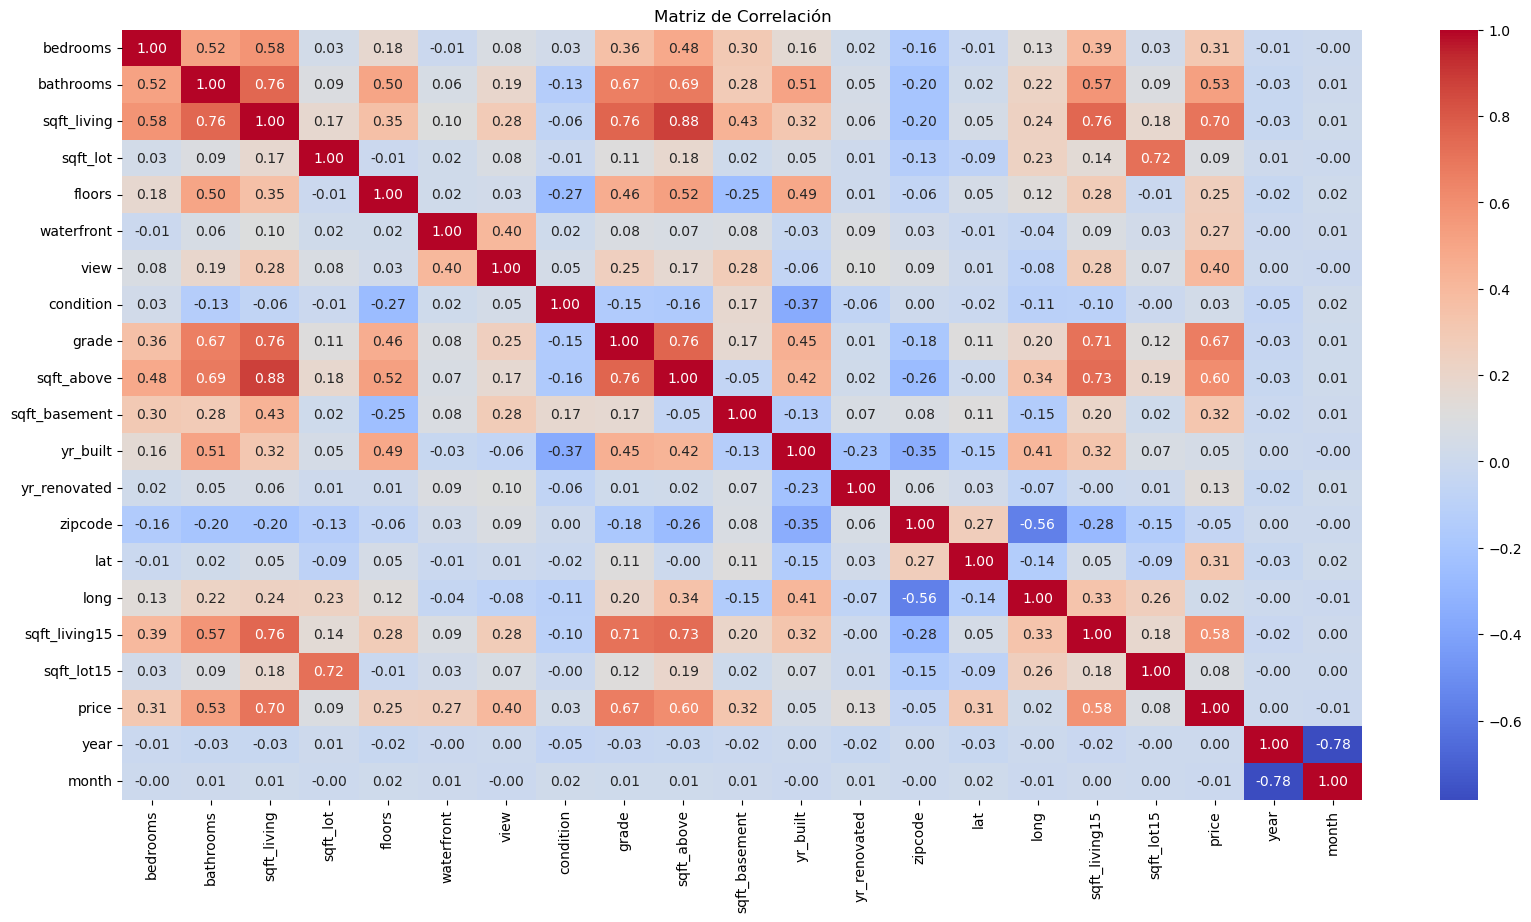

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


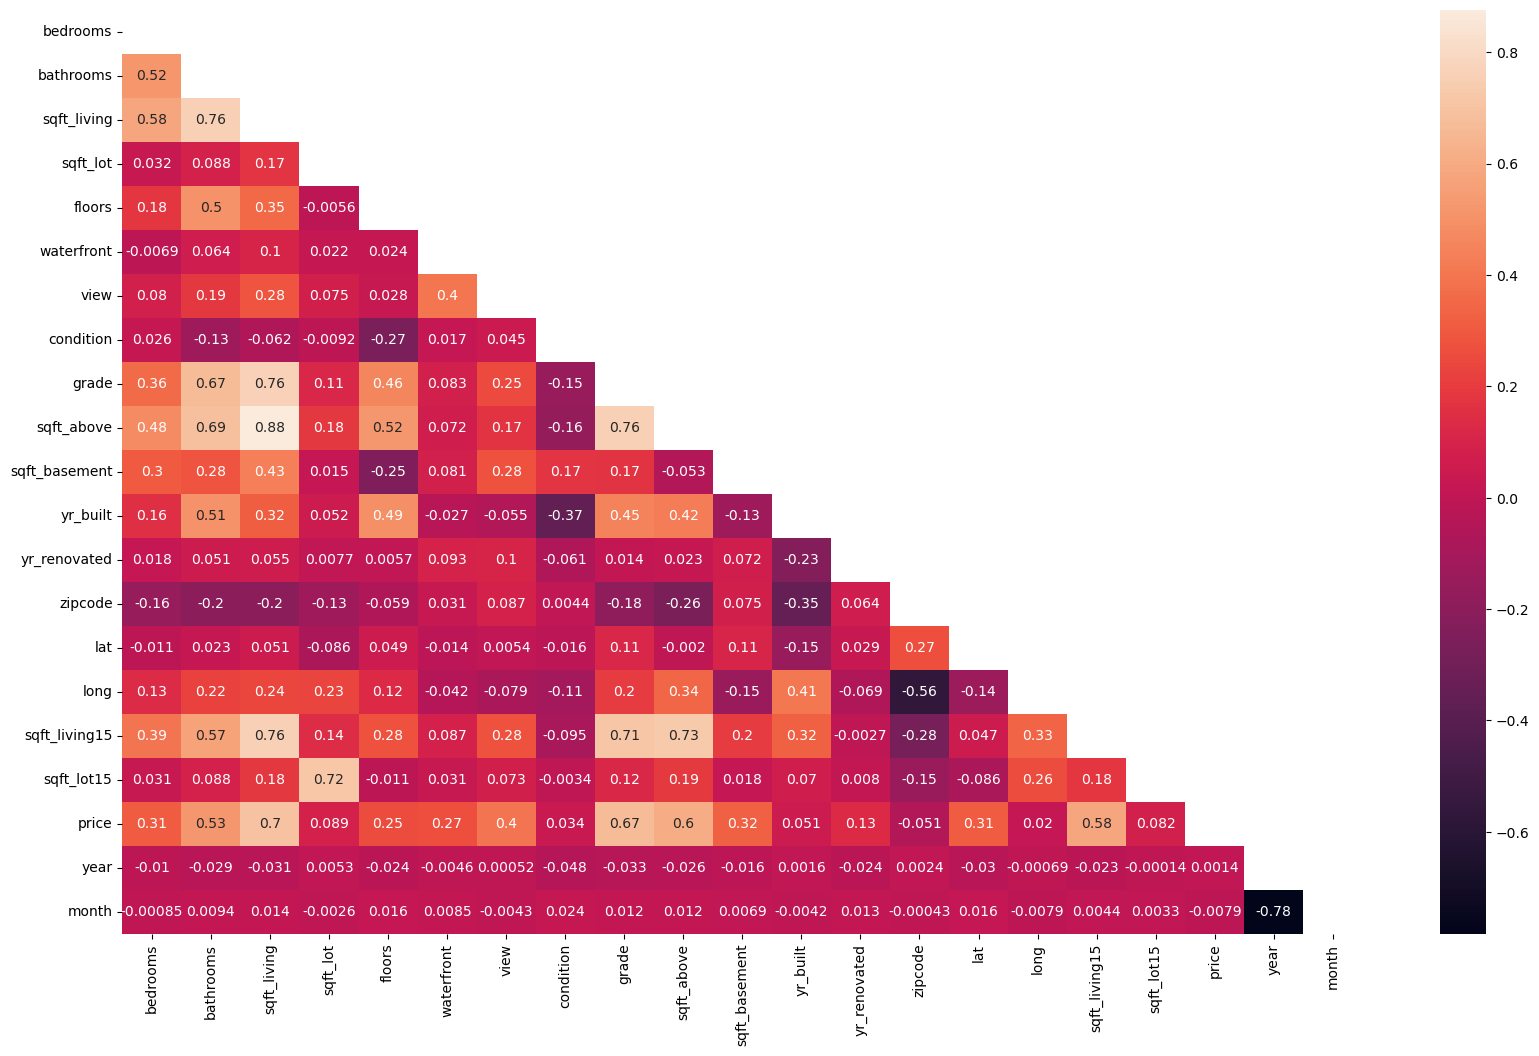

In [24]:
# vamos a centrarnos solo en un mapa de calor, pero solo mostrando mitad inferior

mask = np.zeros_like(df.corr()) #Esto crea una matriz de zeros del mismo tamaño que la matriz de correlación de data. data.corr() calcula la matriz de correlación entre todas las columnas numéricas del DataFrame data
mask[np.triu_indices_from(mask)] = True #np.triu_indices_from(mask) obtiene los índices de la matriz triangular superior (incluyendo la diagonal). Luego, se asigna True a estos índices en la máscara. Esto significa que la mitad superior (incluida la diagonal) de la máscara ahora contiene True y la mitad inferior contiene False
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


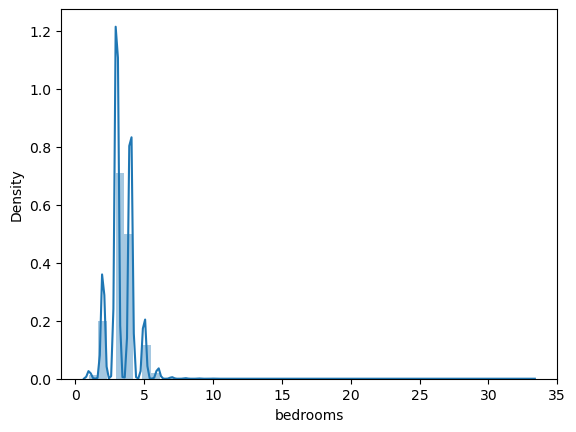

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


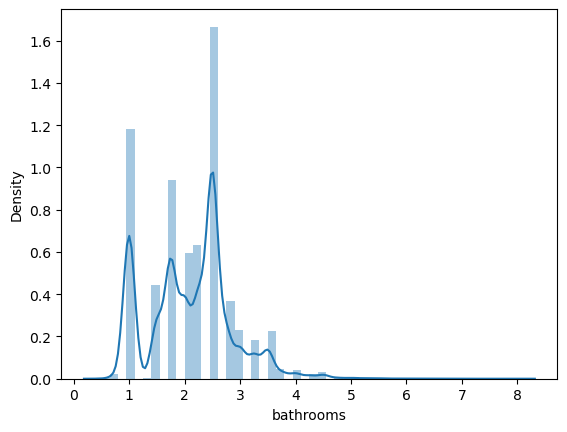

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


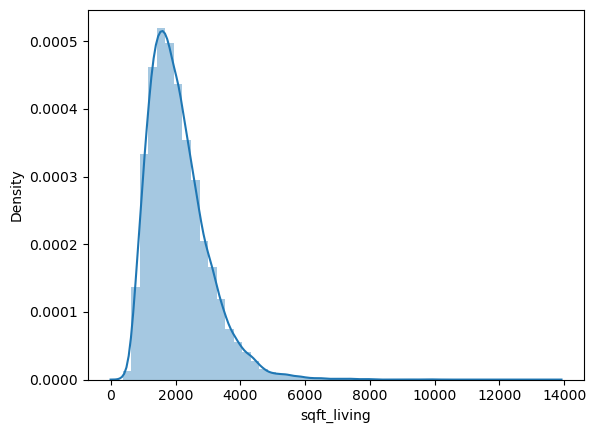

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


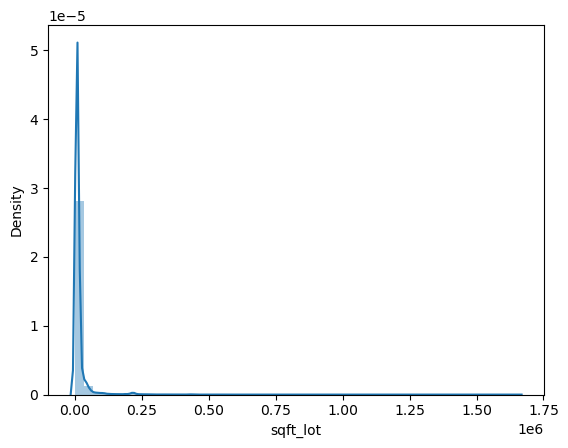

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


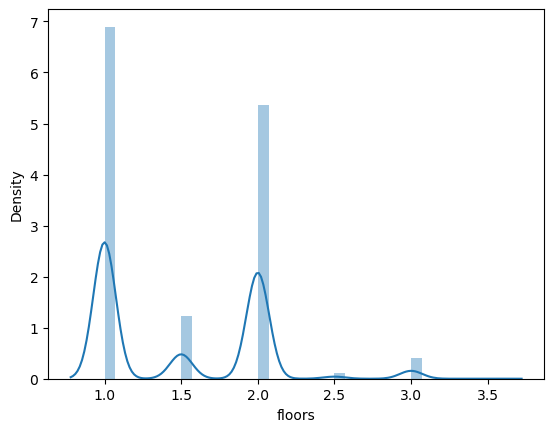

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


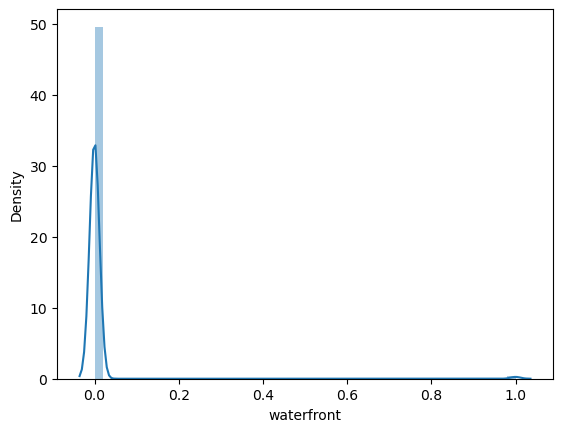

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


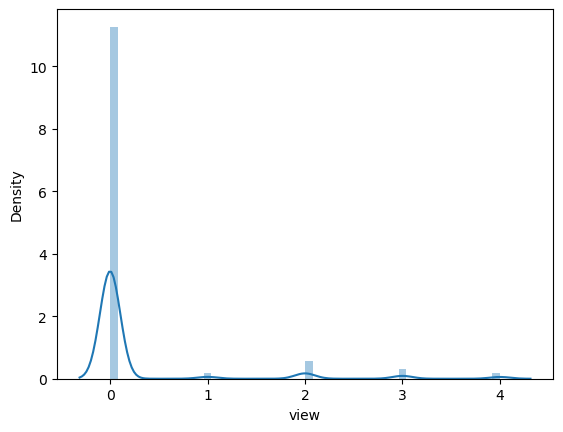

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


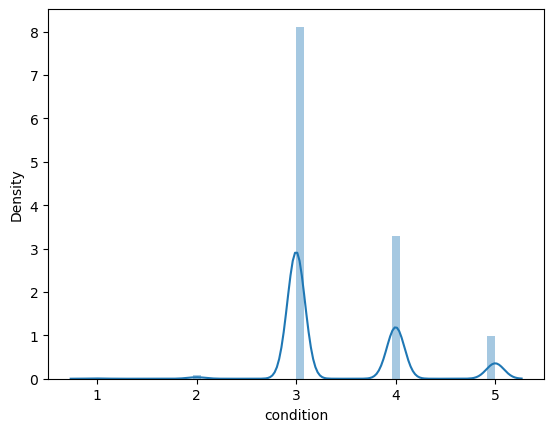

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


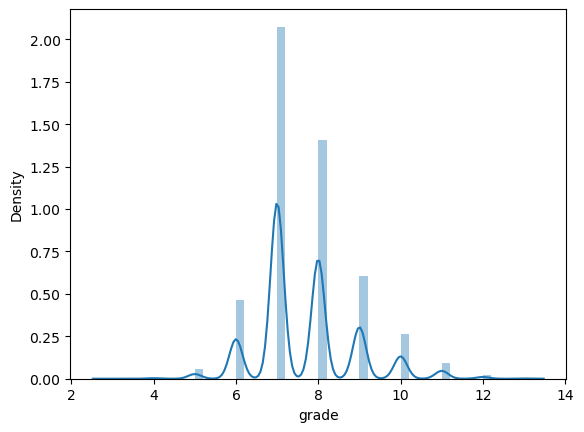

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


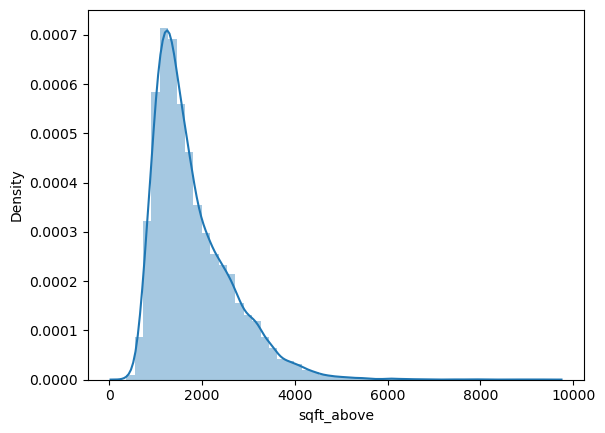

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


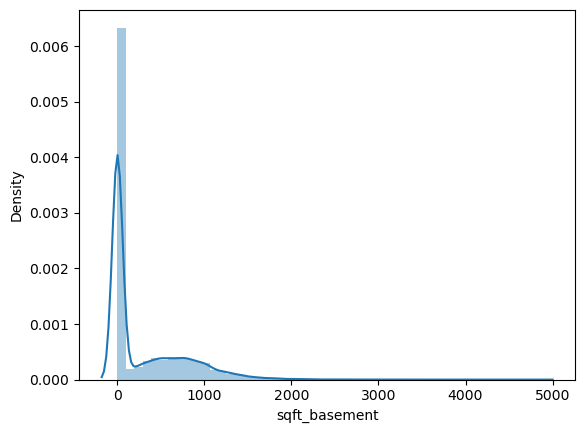

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


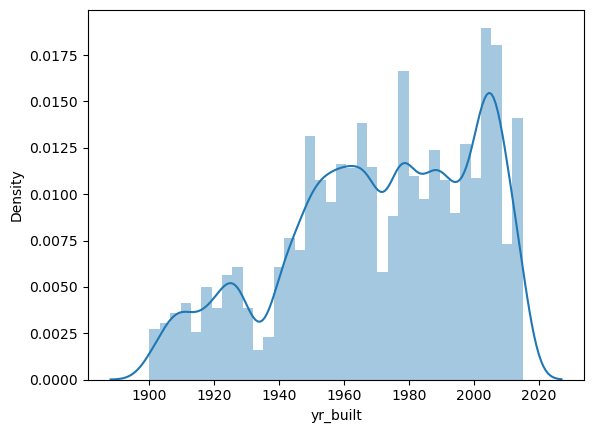

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


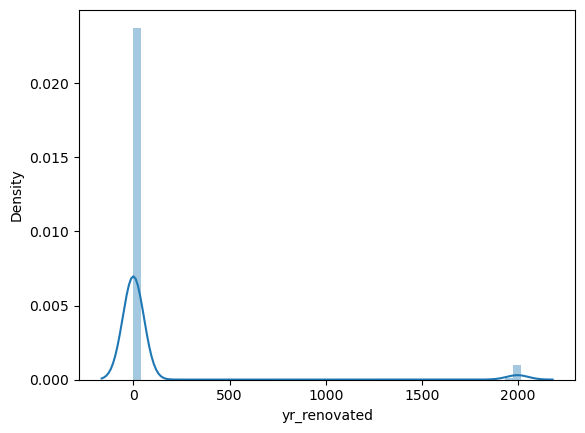

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


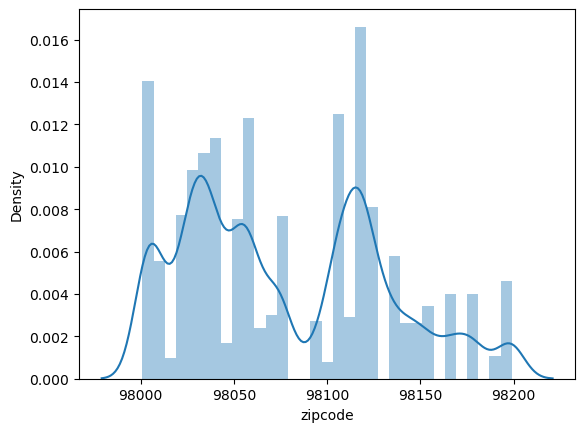

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


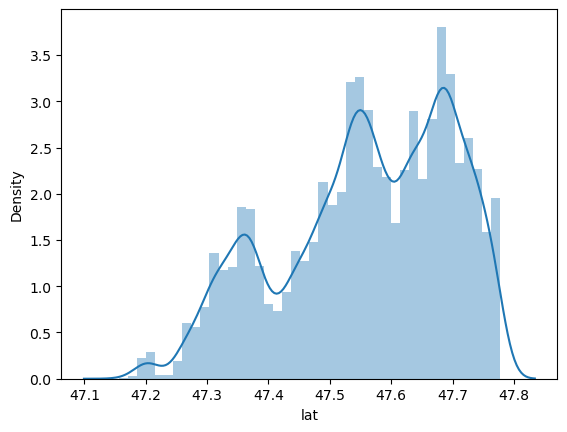

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


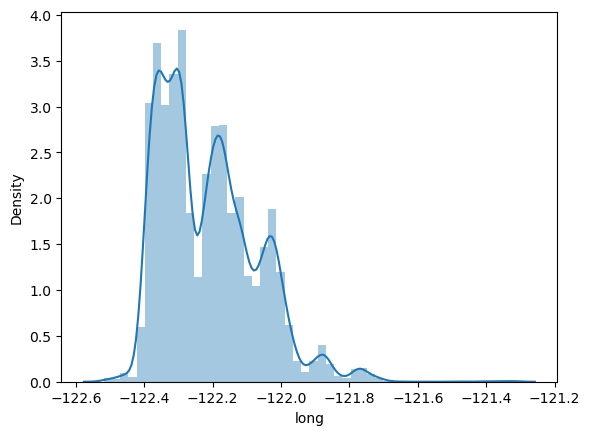

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


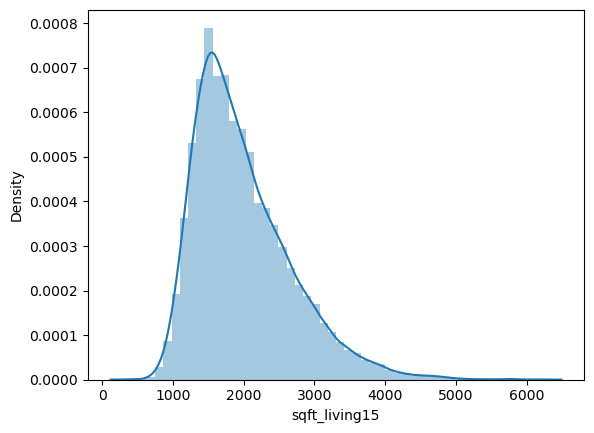

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


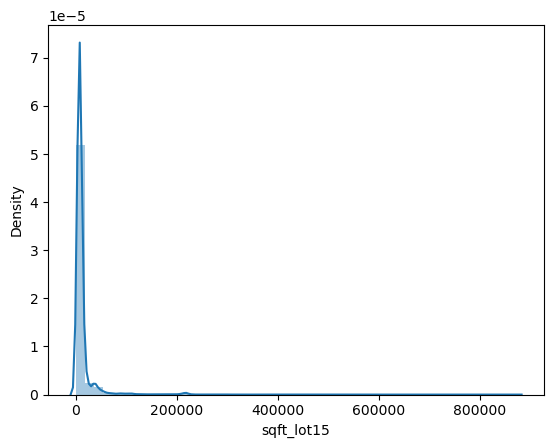

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


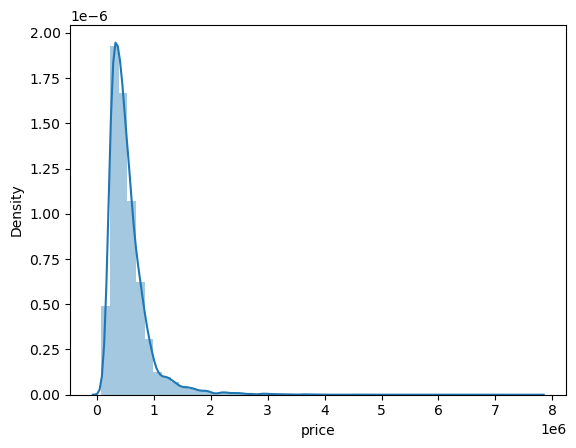

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


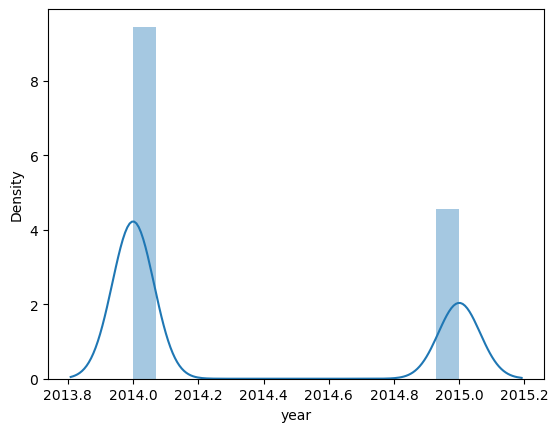

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\3507398021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


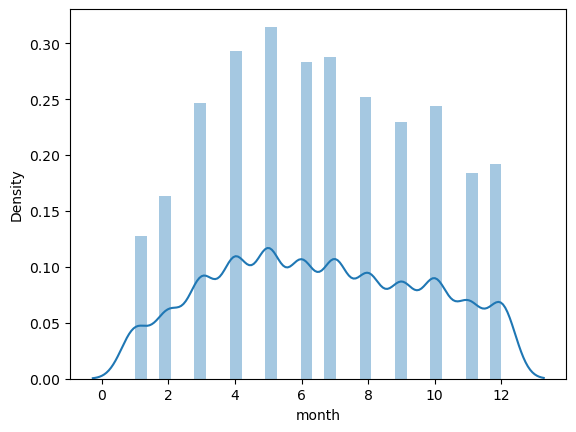

In [25]:
# vamos a crear las graficas iterando 
for columns in df.columns:
    sns.distplot(df[columns])
    plt.show() # con esto vamos a ver cada gráfico y su densidad en base al número de esa variable

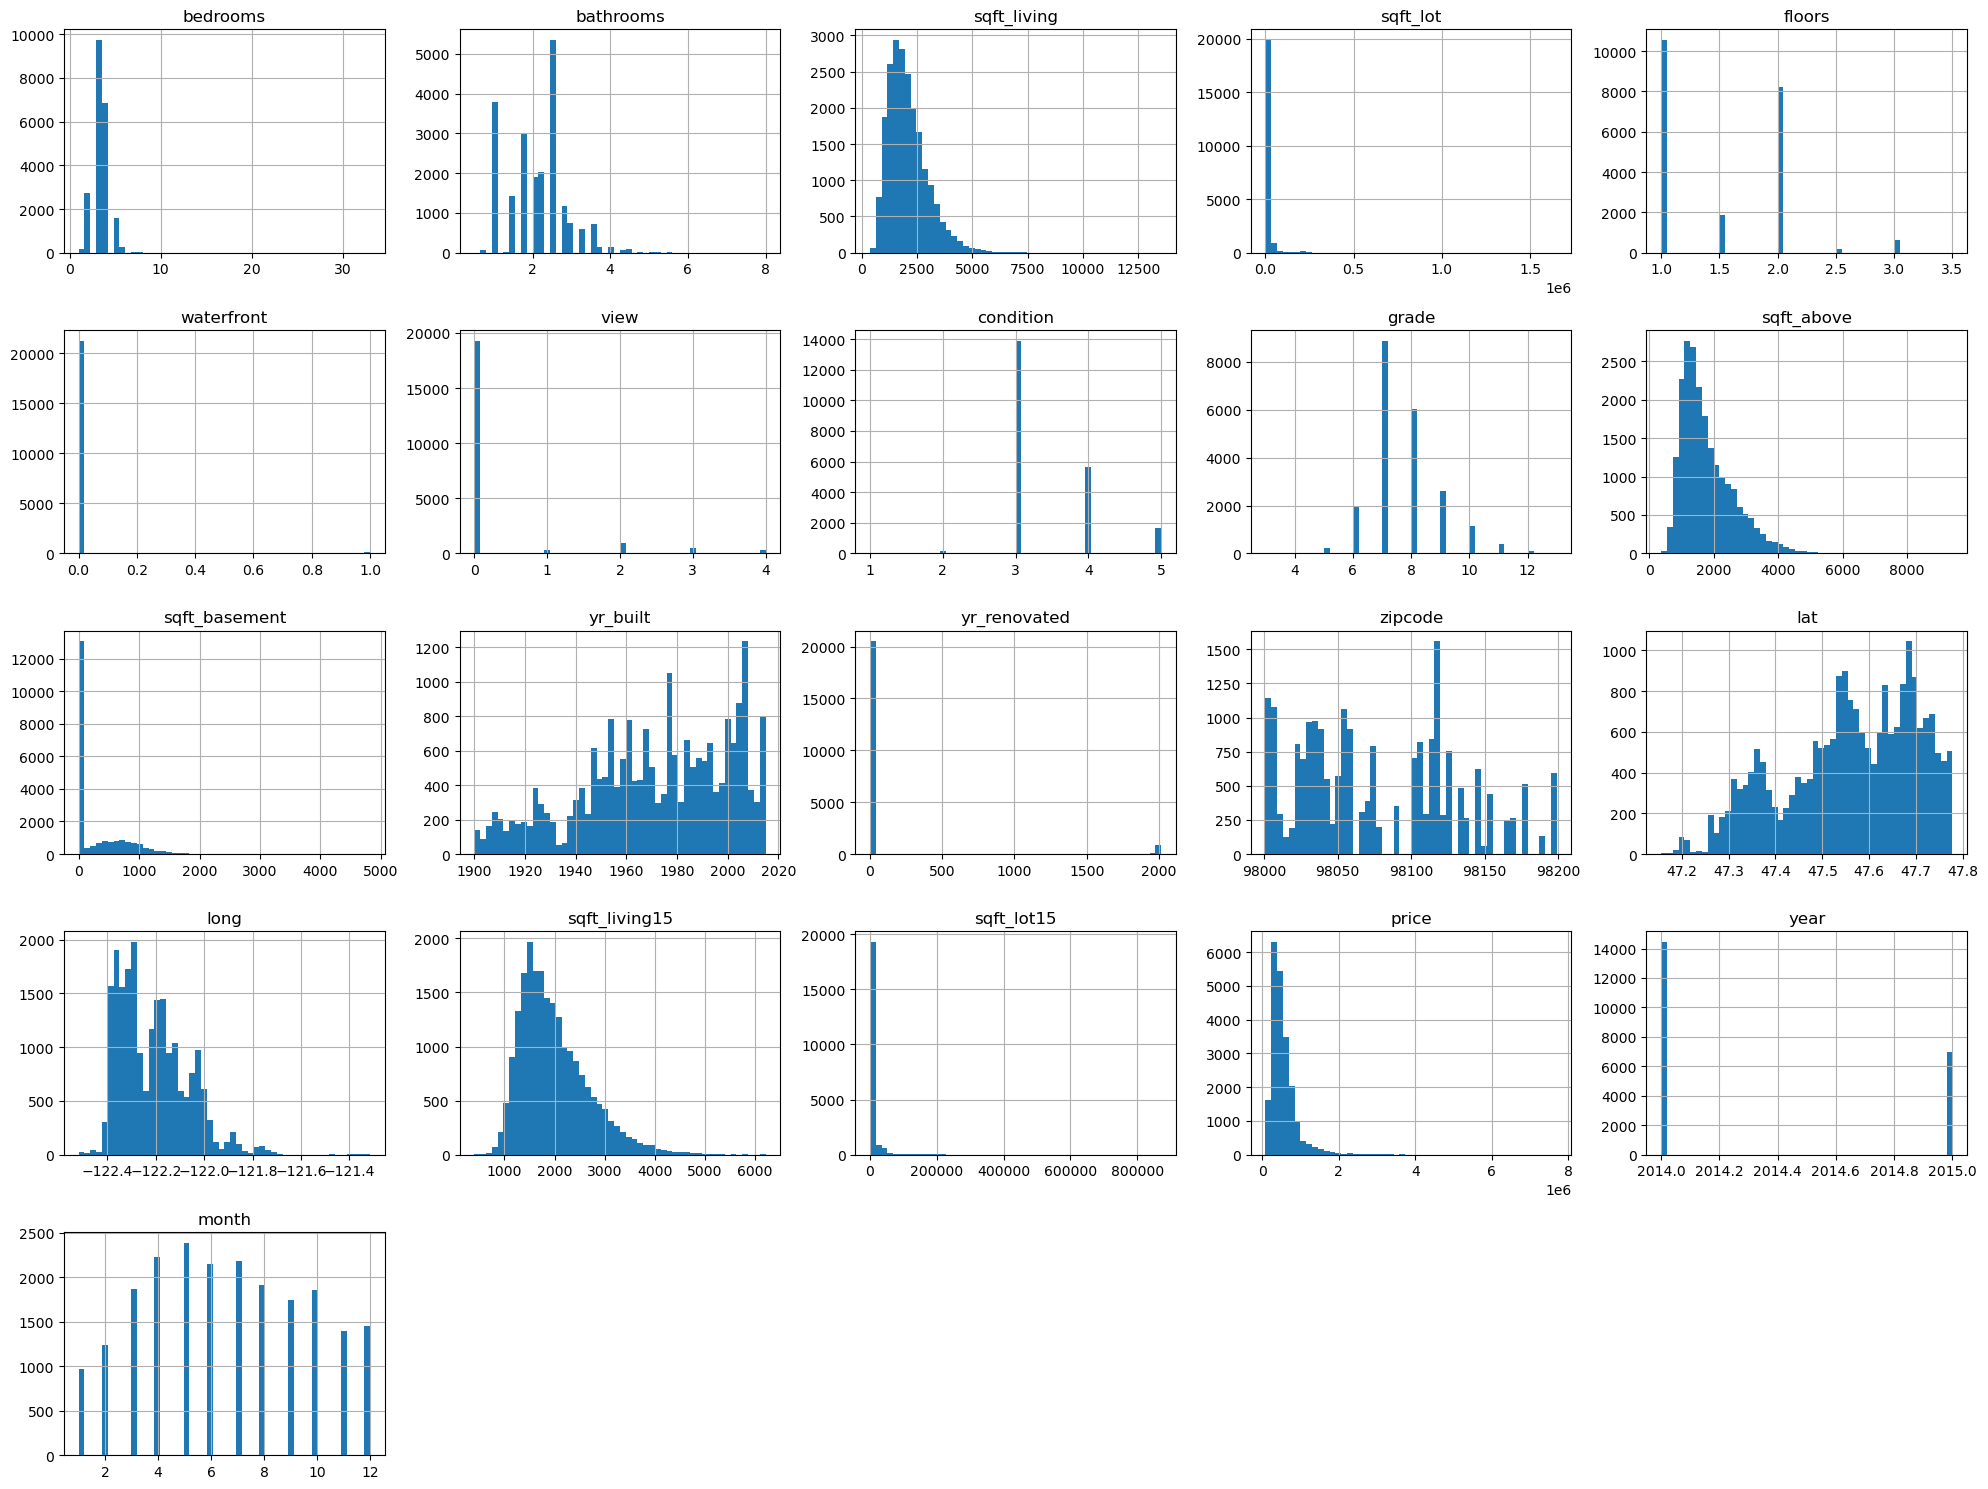

In [26]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show() # de esta manera lo vemos más organizado y contando por unidades 

In [27]:
def log_transform(x): #vamos a crear esta funcion que toma un número y devuelve su logaritmo si es un número válido y no es cero y que me devuelva un NaN
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [28]:
df1 = df.copy() # vamos a crearnos una copia para ver solo la variable precio, aplicar la funcion de arriba y algun valor es Nan que me meta la media

df1['price'] = df1['price'].apply(log_transform).fillna(df1['price'].mean())

C:\Users\danie\AppData\Local\Temp\ipykernel_11716\1117663167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']) #mostrar la distribución de los precios transformados


<Axes: xlabel='price', ylabel='Density'>

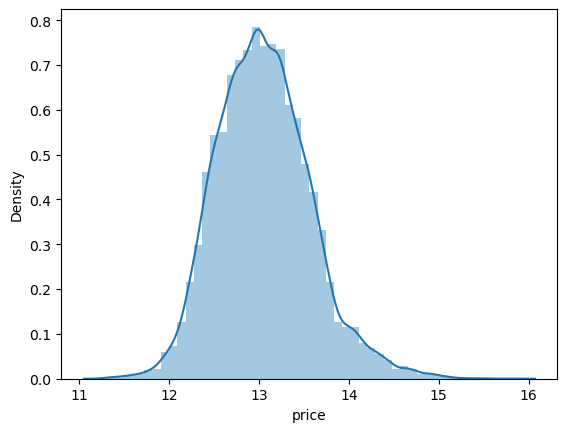

In [29]:
sns.distplot(df1['price']) #mostrar la distribución de los precios transformados

In [30]:
df.corr()['price'].sort_values() #vamos a ver las coorelaciones con el precio

zipcode         -0.051169
month           -0.007920
year             0.001385
long             0.019826
condition        0.034219
yr_built         0.051012
sqft_lot15       0.082045
sqft_lot         0.088789
yr_renovated     0.126705
floors           0.254972
waterfront       0.266995
lat              0.306439
bedrooms         0.309640
sqft_basement    0.323960
view             0.396683
bathrooms        0.525215
sqft_living15    0.583792
sqft_above       0.604424
grade            0.666835
sqft_living      0.701295
price            1.000000
Name: price, dtype: float64

In [53]:
# podemos ver que los metros cuadros en general, el estado de la casa son las variables que más afectan al precio

# Train Test split for df

In [31]:
#vamos con el Train Test Split de la Data

In [32]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [34]:
# vamos a normalizarlo
from sklearn.preprocessing import Normalizer
numericals = X.select_dtypes(np.number) 

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

In [35]:
# vamos a entrenar el modelo con regresión linear
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
lr.score(X_test, y_test)

0.7145487104417677

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
predictions = lr.predict(X_test)

In [39]:
predictions

array([409016.15740316, 449228.52723815, 238971.58453538, ...,
       516425.74226253, 491570.43326137,  25940.80263211])

In [40]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.7145487104417677, 122810.2813717031, 185672.04765813245)

El r2 de aproximadamente 0.715 sugiere que el modelo tiene un buen ajuste a los datos de prueba, explicando alrededor del 71.5% de la variabilidad en los datos.
El MAE de aproximadamente 122810.28 indica que las predicciones del modelo, en promedio, están desviadas de los valores reales en alrededor de 122810.28 unidades.
El MSE de aproximadamente 185672.05 indica que, en promedio, el cuadrado de la desviación entre las predicciones del modelo y los valores reales es de alrededor de 185672.05 unidades.

Los resultados sugieren que el modelo tiene un buen ajuste a los datos

MAE: 122810.2813717031
MSE: 34474109281.563805
RMSE: 185672.04765813245


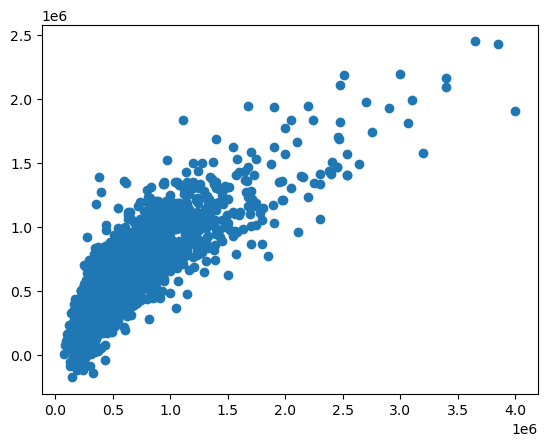

In [41]:
# vamos a realizar ahora las predicciones 

predictions = lr.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

In [42]:
#ahora vamos hacer lo mismo pero con el df1 que nos habíamos creado

# Train Test split for df1


In [43]:

X = df1.drop(['price'], axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [44]:
# ahora vamos a normalizarlo

numericals = X.select_dtypes(np.number) 

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

In [45]:
# ahora lo vamos a entrenar con el modelo de regresión para df1
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
lr.score(X_test, y_test)

0.7684761797654657

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
predictions = lr.predict(X_test)

In [49]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)


(0.7684761797654657, 0.1936587209391074, 0.2510776203081081)

MAE: 0.1936587209391074
MSE: 0.06303997141958251
RMSE: 0.2510776203081081


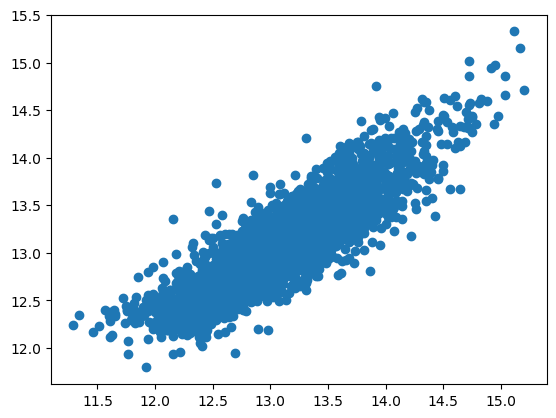

In [50]:
predictions = lr.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

La transformación logarítmica aplicada en df1 parece haber mejorado significativamente el rendimiento del modelo de regresión lineal en comparación con data, lo que resulta en predicciones más precisas y un mejor ajuste a los datos de prueba. Esto destaca la importancia del preprocesamiento adecuado de los datos en la mejora del rendimiento de los modelos de aprendizaje automático.

In [51]:
# ahora vamos hacerlo con el Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train Test split for data Random Forest Regressor


In [53]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
models = []

models.append(("RandomForestRegressor", RandomForestRegressor()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_test, y_test,  cv=3)
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i])

RandomForestRegressor [0.86770649 0.83990251 0.85231143]


MAE: 542028.6106627753
MSE: 425840462035.17725
RMSE: 652564.5271045441


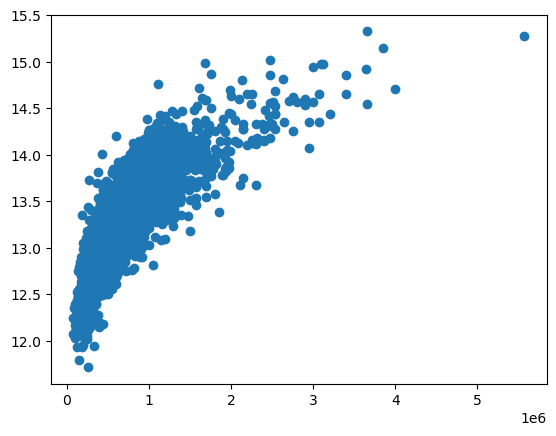

In [55]:
predictions = lr.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

# Train Test split for df1 Random Forest Regressor


In [56]:
X = df1.drop(['price'], axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
models = []

models.append(("RandomForestRegressor", RandomForestRegressor()))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_test, y_test,  cv=3)
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i])

RandomForestRegressor [0.87310404 0.86898835 0.88388637]


MAE: 0.1943290739930095
MSE: 0.06276073734321623
RMSE: 0.2505209319462472


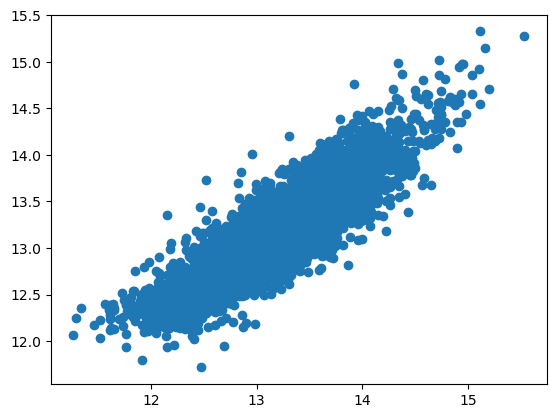

In [58]:
predictions = lr.predict(X_test)  
plt.scatter(y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

Aquí volvemos a ver que habiendo tratado el df1 con el algoritmo se dan unos resultados mucho mejores